# Exploratory Data Analysis for Predicting Health Care Costs and Risk Group Segmentation for an Insurance Company

Overview of the Question: The objective of this project is to explore how personal attributes
such as age, BMI, smoking habits, and geographic region affect medical costs. The primary
question I aim to answer is: How can I predict an individual's medical costs based on their
health and demographic characteristics? Additionally, I seek to understand if I can identify
distinct risk groups based on these attributes to help insurers offer personalized health plans and
optimize premium pricing.

## Data Description:

The dataset I will use for this analysis is the Medical Cost Personal Dataset, which
contains information on individuals' medical expenses and their demographic and health-related
features. The dataset includes 1,338 samples with the following features:
• Age: Continuous value representing the individual's age.
• BMI (Body Mass Index): A measure of body fat based on height and weight.
• Children: The number of children covered by health insurance.
• Sex: Categorical variable indicating gender.
• Smoker: Categorical variable representing whether the individual is a smoker or nonsmoker.
• Region: Categorical variable for the individual's geographic location in the United States.
• Charges: The target variable represents the individual's medical expenses.
This dataset provides a diverse set of features that will help us investigate the relationships
between personal attributes and medical costs.

#### - The data are provided by:
https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv 

### Techniques to Be Used: 
I will employ a combination of machine learning techniques,
including dimensionality reduction, clustering, and predictive modeling, to answer the
research questions. Here are the main methods I might use:
1. **Exploratory Data Analysis (ECA):** I will use PCA to reduce the dimensionality of
the dataset, focusing on the most significant components that explain the variation in
medical costs. PCA will help us simplify the dataset while preserving the most important
patterns. By reducing the number of features, I aim to improve interpretability and make
the clustering and modeling steps more efficient.

2. **Predictive Modeling (Linear Regression/Random Forest):** I will build a regression
model to predict the target variable, medical charges, based on the input features. Both
Linear Regression and Random Forest models will be explored to assess which
performs better in predicting medical costs. I will evaluate the model using metrics such
as mean squared error (MSE) and R-squared to determine how well our models
generalize to new data.

3. **Clustering (KMeans):**  I will use KMeans clustering to segment individuals into
   different cost tiers based on their health and demographic attributes. This
clustering will help us identify common characteristics among high-cost individuals (e.g.,
smokers, high BMI, older age). The goal is to group individuals into low, medium, and
high-risk categories, which can assist insurance companies in tailoring premiums based
on health risk profiles.

 4. Additionally, I will evaluate the model's ability to provide insights into which factors
(e.g., smoking status, BMI, age) are the most significant predictors of high medical costs.

Expected Insights: Through this project, I expect to uncover valuable insights, such as:

• **Key Drivers of Medical Costs:** Identify the main factors (e.g., smoking, high BMI) that
significantly contribute to increased medical expenses.

• **Segmentation of Cost Groups:** By clustering individuals, I hope to identify distinct
groups that share similar risk profiles, providing a basis for personalized health
interventions or premium adjustments.

• **Predictive Models:** A regression model that accurately predicts medical costs will be
highly useful for health insurance companies looking to forecast expenses and offer
competitive premiums based on individual characteristics.


## Standard package imports

In [10]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

warnings.filterwarnings("ignore")
#matplotlib.style.use("ggplot")
%matplotlib inline

## Load the Data

In [44]:
df = pd.read_csv("insurance.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1271,25,female,34.485,0,no,northwest,3021.80915
324,29,male,27.200,0,no,southwest,2866.09100
1232,54,female,24.605,3,no,northwest,12479.70895
211,40,male,30.875,4,no,northwest,8162.71625
547,54,female,46.700,2,no,southwest,11538.42100
648,18,male,28.500,0,no,northeast,1712.22700
1162,30,male,38.830,1,no,southeast,18963.17192
545,49,male,25.840,2,yes,northwest,23807.24060
678,56,male,36.100,3,no,southwest,12363.54700
98,56,male,19.950,0,yes,northeast,22412.64850


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Are there any duplicates?


In [ ]:
df.nunique()

In [ ]:
# 
df.duplicated(subset=['age', 'sex', 'bmi', 'smoker', 'region', 'charges']).sum()


In [ ]:
# This will display all duplicate rows (excluding the first occurrence)
df[df.duplicated(subset=['age', 'sex', 'bmi', 'smoker', 'region', 'charges'])]

In [ ]:
## Drop Duplicated row 581
df.drop_duplicates(subset=['age', 'sex', 'bmi', 'smoker', 'region', 'charges'], keep='first', inplace=True)


In [ ]:
df.duplicated(subset=['age', 'sex', 'bmi', 'smoker', 'region', 'charges']).sum()

#### The sample size= 1338, min, max values are within range of plausible values. The mean chrges=13270$

### Are there any Null values in the data?

In [ ]:
## Getting counts and percentages of missing values for each column
df.isna().sum()
df.isna().mean().round(2).multiply(100).sort_values(ascending= False)


#### Removed duplicated rows, New sample size= 1337. No issues with Missing Data

### 🔍 Exploratory Data Analysis (EDA): Basic Distributions and Correlations

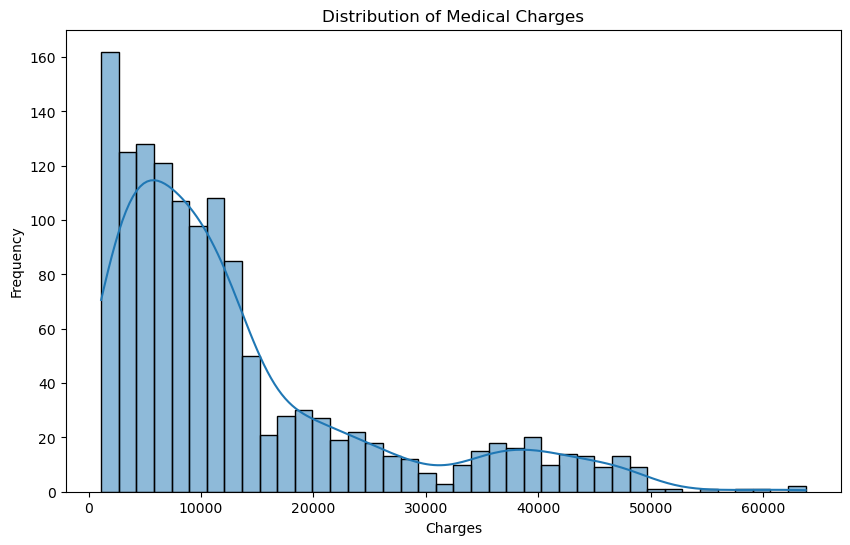

In [46]:

# Histogram of medical charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=40)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.savefig("eda_output/charges_hist.png")
plt.show()


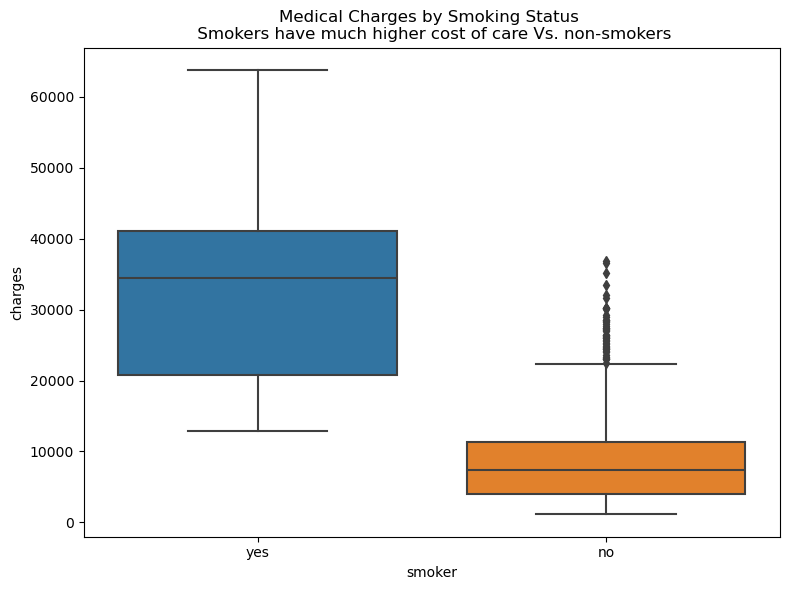

In [52]:

# Boxplot for charges vs smoker status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges by Smoking Status \n Smokers have much higher cost of care Vs. non-smokers")
plt.tight_layout()
plt.savefig("eda_output/charges_by_smoker.png")
plt.show()


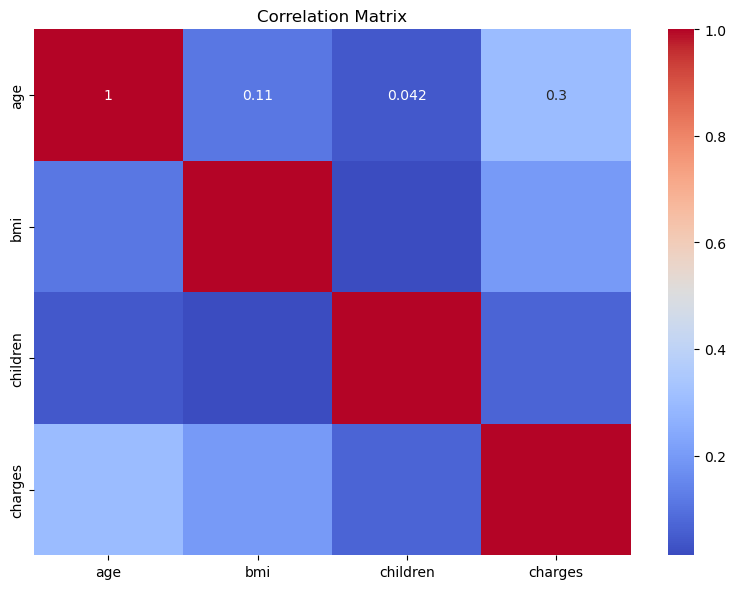

In [54]:

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("eda_output/correlation_heatmap.png")
plt.show()


## Conclusion: 
1. Charges are significantly skewed to the right. This is typical with financial data.
2. The density indicates four tiers of charges: 0- 15k, 15-30, 30-50, and a few outliers at over 50k.
3. Smokers have a much higher cost of care than non-smokers 

### Exploratory Data Analysis

In [57]:
import matplotlib.pyplot as plt

def plot_hist(df, feature_name, log=False, bins=50):
    data = df[feature_name]
    if log:
        data = np.log1p(data)
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, edgecolor='k')
    plt.title(f"Histogram of {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


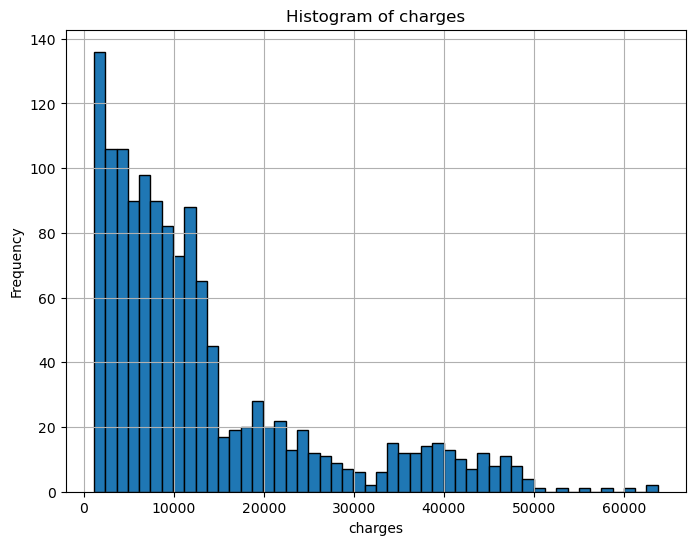

In [59]:
plot_hist(df, feature_name="charges", log=False)

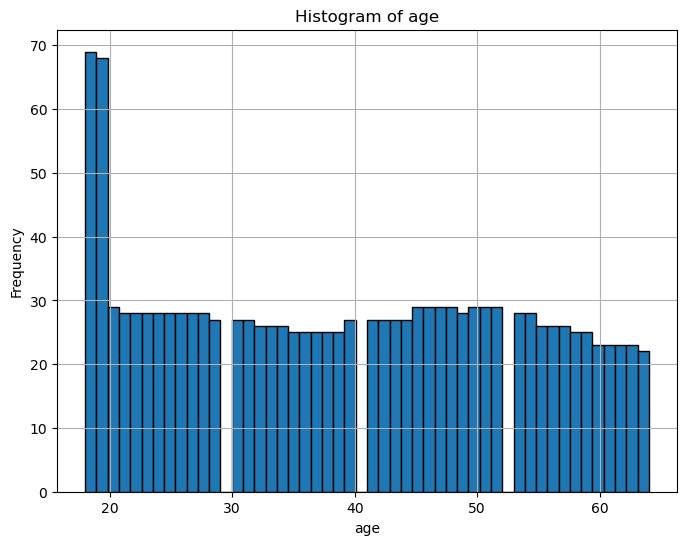

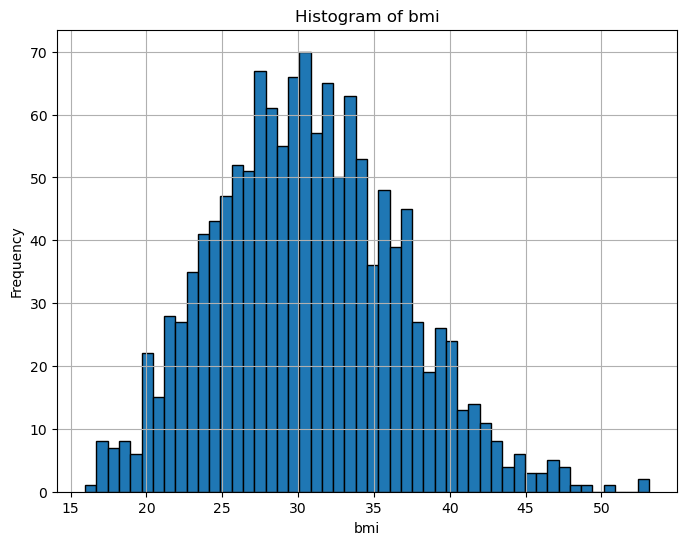

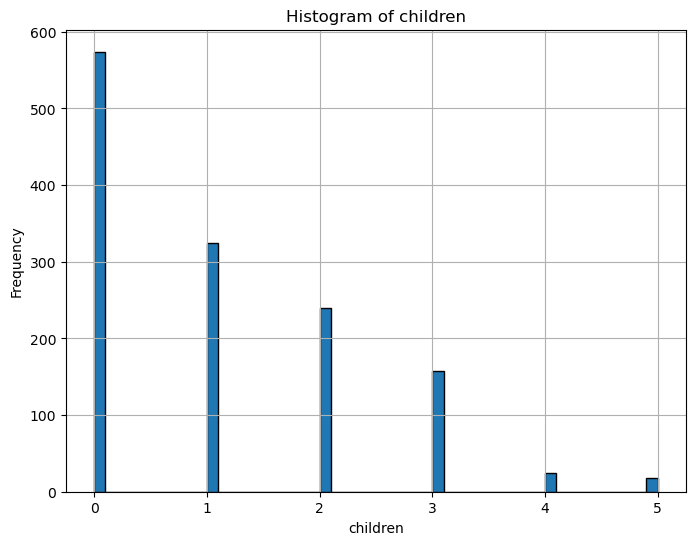

In [61]:
for name in ['age', 	'bmi', 	'children']:
    plot_hist(df, feature_name=name, log=False)
   

## Insights:
1. Age 18 and 19 are overrepresented in the data. The rest of the ages 20-64 have a uniform distribution. 
2. BMI has a right-skewed distribution. 
3. The number of children ranged from 0-5, with the majority of the insured having 0-2 children and very few having 4-5 children.


## age 	sex 	bmi 	children 	smoker 	region 	charges

Text(0.5, 1.0, 'Boxplot of the charges shows skewness & outliers \n Most insured cost less than 35K')

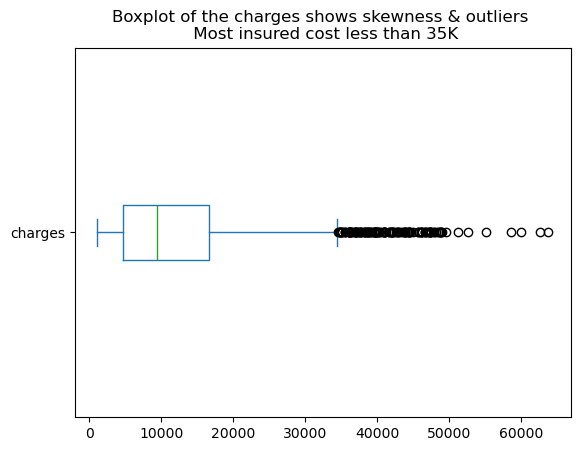

In [72]:
df["charges"].plot(kind = "box", vert = False);
plt.title("Boxplot of the charges shows skewness & outliers \n Most insured cost less than 35K") 


## Bivariate EDA:

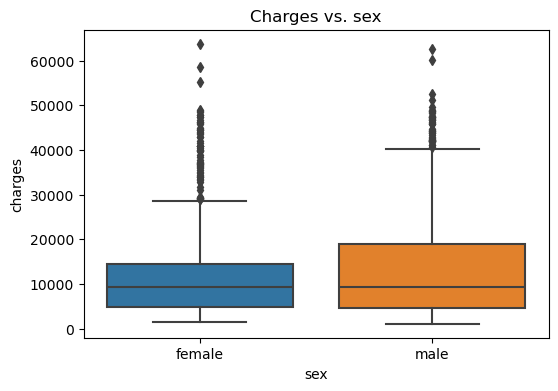

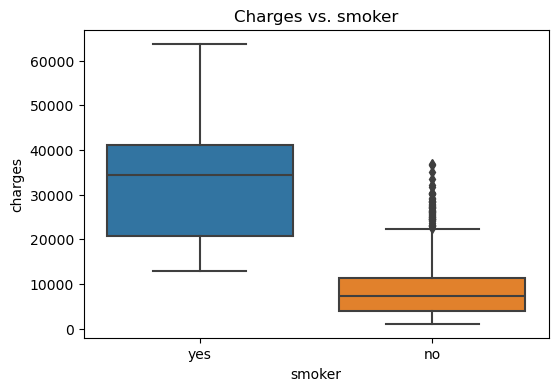

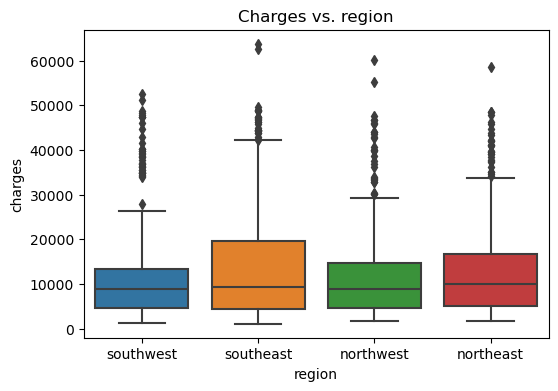

In [96]:
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=df[col], y=df['charges'])
    plt.title("Charges vs. "+ col)
    plt.show()

### Insights:
1. There is a linear relation between Age and the median charges.
2. The charges per region seem to have similar medians, but the region Southeast appears to have a higher variability in charges Vs the other regions. 
Regardless of region, the distributions are all skewed right with a large number of outliers.
3. There is a huge diff between smokers and non-smokers with smokers charging much more than non-smokers. 
4. Higher charges associated with higher BMI.
5. Charges have comparable medians by Sex with more variability among males. 
6. comparable median charges for different number of childrens. 


### Exploring bivariate relationships within numerical variables.

In [79]:
numeric_col =['charges', 'age','bmi','children']
corr = df[numeric_col].corr().round(2)

<Axes: >

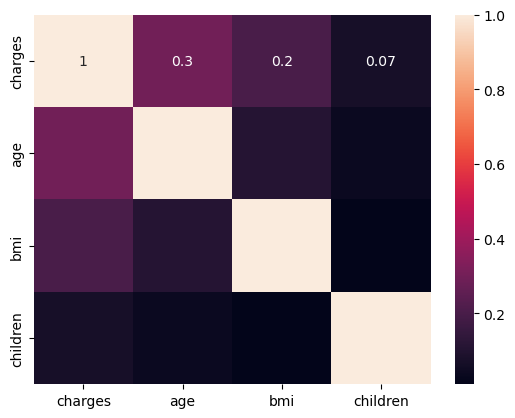

In [81]:
sns.heatmap(corr, annot=True)

#### **Conclusion:** There is a weak positive linear correlation between charges and age, bmi, children (listed in decreasing order by strength or the correlation). 

### Visualizing scatter plots:

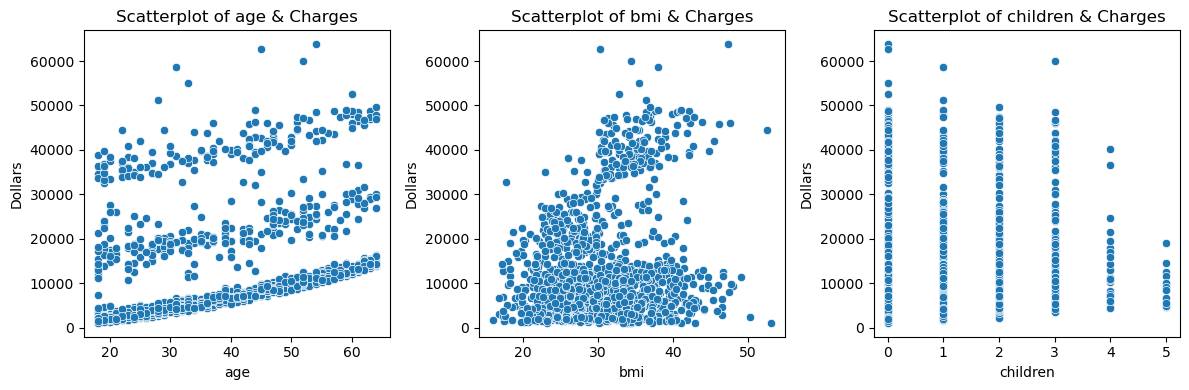

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
numeric_col =['age','bmi','children']
for i, column in enumerate(numeric_col):
    sns.scatterplot(x=df[column], y=df['charges'], ax=axes[i])
    axes[i].set_title(f'Scatterplot of {column} & Charges')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.savefig("eda_output/Charges vs. Numerical Variables.png")

plt.show()

### Conclusion: 
1. Weak positive linear relation between Charges and age, bmi. 
2. Weak negative linear association between charges and the number of children. 

### Exploring bivariate relations between age and charges colorded by sex, smoker and region

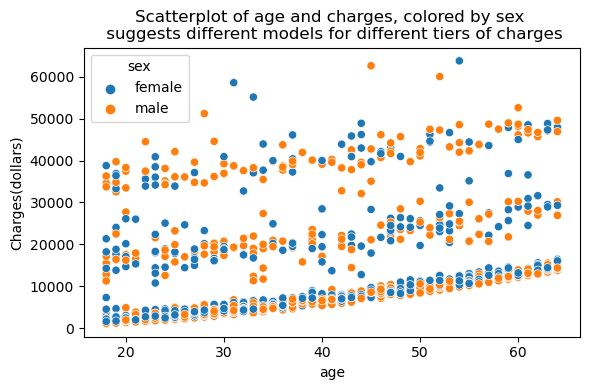

In [104]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['sex'])

plt.title('Scatterplot of age and charges, colored by sex \n suggests different models for different tiers of charges')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')

plt.tight_layout()
plt.savefig("eda_output/charges_Vs_Age_by_Sex.png")
plt.show()

**Insights:** The graph suggests three clusters where there is a strong linear association between age and charges within the less than 10K group, 
weaker relation within the moderate cost group and weaker relation with outliers for the higher than 30K cost group. 

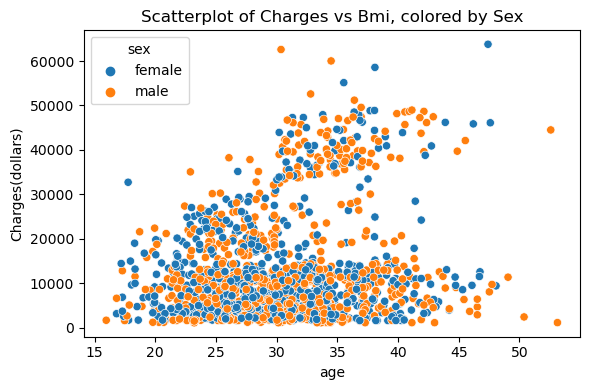

In [109]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['sex'])

plt.title('Scatterplot of Charges vs Bmi, colored by Sex')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')
plt.savefig("eda_output/Charges_Vs_Bmi_by_Sex.png")
plt.tight_layout()
plt.show()

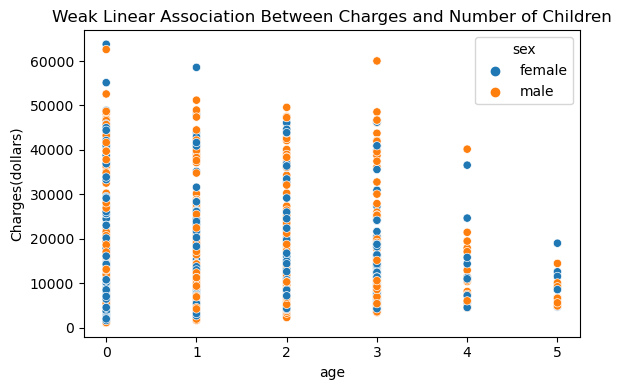

In [119]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['children'], y=df['charges'], hue=df['sex'])

plt.title('Weak Linear Association Between Charges and Number of Children')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')

plt.tight_layout()
plt.savefig("eda_output/Charges_Vs_ Children.png")
plt.show()

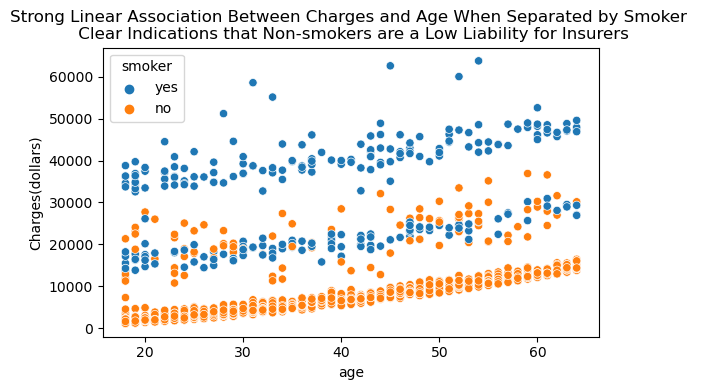

In [129]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'])

plt.title('Strong Linear Association Between Charges and Age When Separated by Smoker \n Clear Indications that Non-smokers are a Low Liability for Insurers')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')

plt.tight_layout()
plt.savefig("eda_output/Charges_Age_by_Smoker.png")
plt.show()

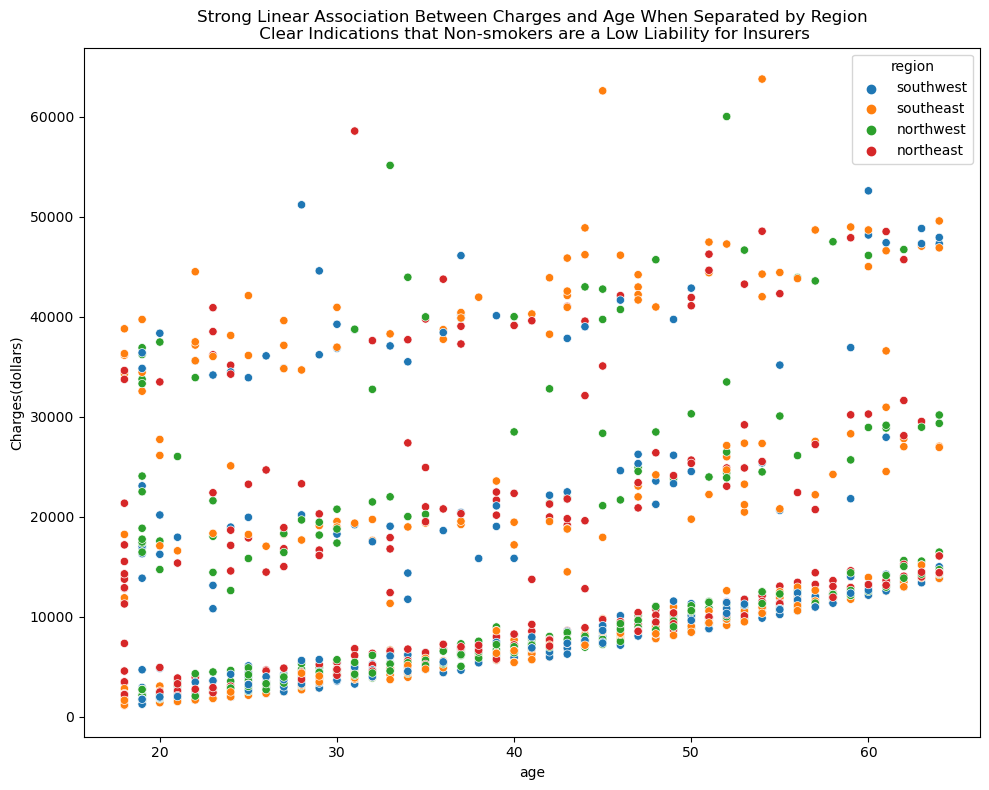

In [131]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['region'])

plt.title('Strong Linear Association Between Charges and Age When Separated by Region\n Clear Indications that Non-smokers are a Low Liability for Insurers')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')

plt.tight_layout()
plt.savefig("eda_output\Charges_Vs_Age_Region.png")
plt.show()

**Insights** Again we see three parallel lines can be a good fit for the data, indicating that we should look into clusters by charges or create indicator variables for low, medium, and high charges. In other words, there are different lines fitted to charges Vs age depending on the category of charges, No clear separation between the regions indicating that the region is a weak predictor of charges or no sig diff between regions. 

<Figure size 1000x800 with 0 Axes>

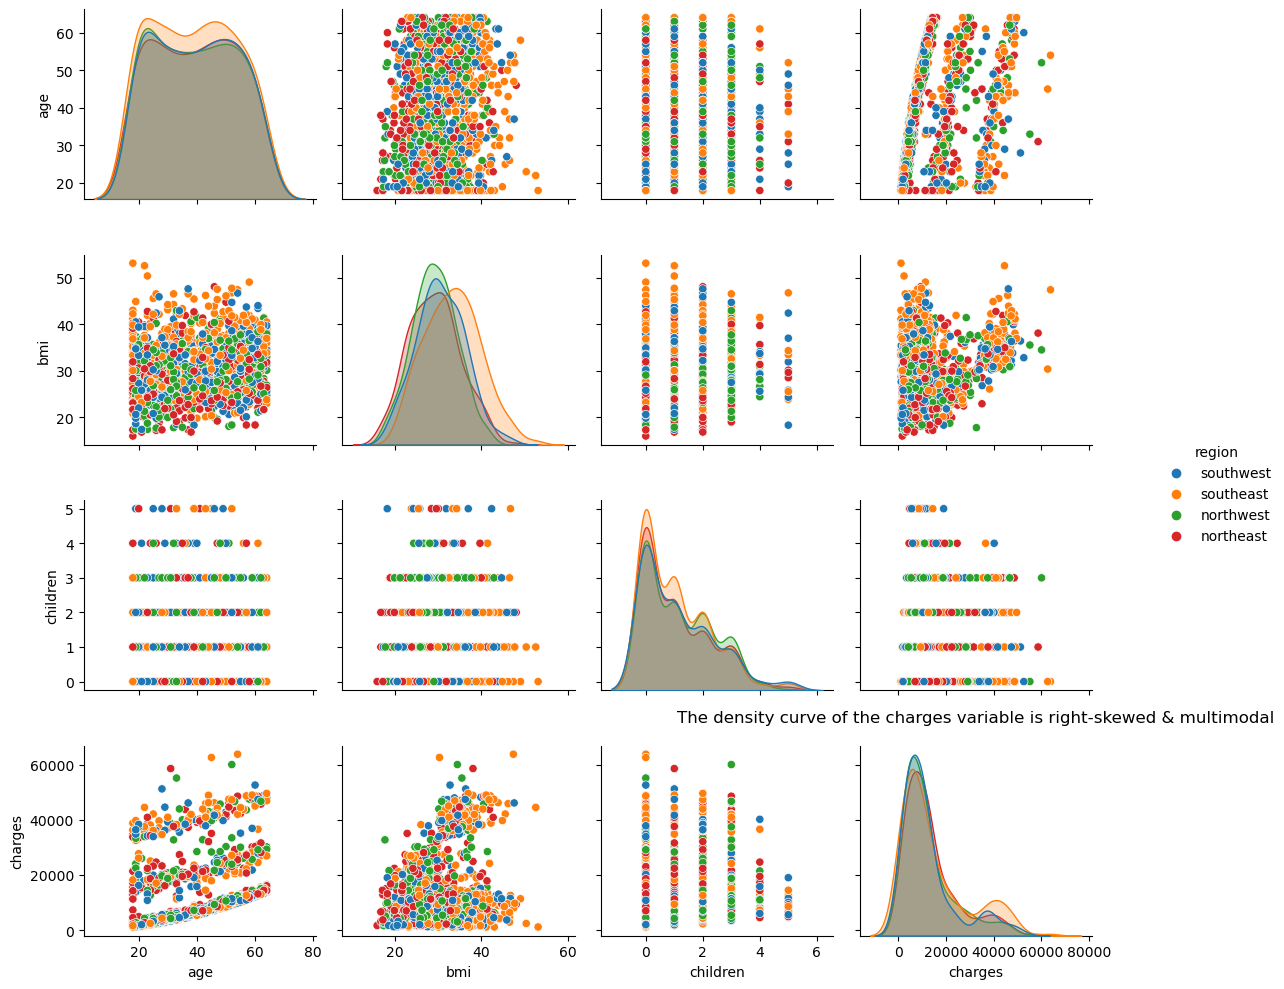

In [136]:
# Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='region')

plt.title('The density curve of the charges variable is right-skewed & multimodal')
plt.tight_layout()
plt.savefig("eda_output\Pairs_Quan_Variables.png")
plt.show()

**Insight:**
We notice the multimodal density curve for the charges variable and the skewness of the charges distribution across all four regions. 

In [142]:
## Compute the median price for each manufacturer:
df.groupby("region")["charges"].median().round(3).sort_values(ascending=False)

region
northeast    10057.652
southeast     9294.132
northwest     8965.796
southwest     8798.593
Name: charges, dtype: float64

**Insight** The region Northeast has the highest median charges, followed by SE, NW, SW.

## Splitting the Data into Training and Test Sets

In [146]:
# Define your features (X) and your target variable (y)
# i DROPPED TITLE_STATUS TO SIMPLIFY MODELING 
X = df[['age','bmi','children','smoker', 'sex', 'region']]  
y = df['charges']  # This is our target variable
# Divide the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,bmi,children,smoker,sex,region
560,46,19.95,2,no,female,northwest
1285,47,24.32,0,no,female,northeast
1142,52,24.86,0,no,female,southeast
969,39,34.32,5,no,female,southeast
486,54,21.47,3,no,female,northwest


In [148]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [150]:
X_test.head()

,age,bmi,children,smoker,sex,region
764,45,25.175,2,no,female,northeast
887,36,30.020,0,no,female,northwest
890,64,26.885,0,yes,female,northwest
1293,46,25.745,3,no,male,northwest
259,19,31.920,0,yes,male,northwest


In [152]:
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

In [154]:
print(f"Train set size: {X_train.shape}. Number of labels in the trian set: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Number of labels in the test set: {y_test.shape}")

Train set size: (1070, 6). Number of labels in the trian set: (1070,)
Test set size: (268, 6). Number of labels in the test set: (268,)


## Model Regularization 

In [159]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [163]:
# Define numerical and categorical features
numerical_columns  = ['age','bmi','children']
categorical_columns = ['smoker', 'sex','region'] ## condition can be encoded as ordinal 

In [165]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standarize numerical features
        ('cat', OneHotEncoder(), categorical_columns)  # One-Hot encoding for categorical features
    ])

In [167]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [169]:
X_train_processed

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

In [171]:
X_test_processed 

array([[ 0.40114007, -0.89153925,  0.73433626, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23863782, -0.08946143, -0.91119211, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.75178229, -0.60845296, -0.91119211, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.04091797,  2.78941026, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82765867,  0.60252728, -0.08842793, ...,  0.        ,
         0.        ,  1.        ]])

In [175]:
# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for the categorical columns.
# Check the shape of the processed data
print("Shape of X_train_processed:", X_train_processed.shape)  # Check the number of columns
print("Shape of X_test_processed:", X_test_processed.shape)    # Check the number of columns

# Get the feature names for the categorical columns
name_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine numerical and categorical column names
name_all_columns = list(numerical_columns) + list(name_categorical_columns)
print(name_all_columns)
len(name_all_columns)

Shape of X_train_processed: (1070, 11)
Shape of X_test_processed: (268, 11)
['age', 'bmi', 'children', 'smoker_no', 'smoker_yes', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


11

## Multiple Linear Regression Model to Predict the Cost of Care

In [177]:
# Check the number of columns in the processed data
print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

# Check the length of the column names list
print(f"Number of columns in name_all_columns: {len(name_all_columns)}")
print(name_all_columns)
print(type(name_all_columns))
print(type(X_train_processed))
print(type(X_test_processed))

Shape of X_train_processed: (1070, 11)
Shape of X_test_processed: (268, 11)
Number of columns in name_all_columns: 11
['age', 'bmi', 'children', 'smoker_no', 'smoker_yes', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [179]:
from sklearn.linear_model import LinearRegression
MRM_model = LinearRegression()
MRM_model.fit(X_train_processed, y_train)

LinearRegression()

In [181]:
y_pred = MRM_model.predict(X_test_processed)

In [183]:
len(y_pred)

268

In [185]:
# Coefficients
coefs = MRM_model.coef_
for name, coef in zip(name_all_columns, coefs):
    print(f"Feature: {name:<20} Coefficient: {coef:.4f}")

Feature: age                  Coefficient: 3614.9754
Feature: bmi                  Coefficient: 2036.2281
Feature: children             Coefficient: 516.8902
Feature: smoker_no            Coefficient: -11825.5644
Feature: smoker_yes           Coefficient: 11825.5644
Feature: sex_female           Coefficient: 9.2958
Feature: sex_male             Coefficient: -9.2958
Feature: region_northeast     Coefficient: 459.5852
Feature: region_northwest     Coefficient: 88.9079
Feature: region_southeast     Coefficient: -198.2791
Feature: region_southwest     Coefficient: -350.2141


In [187]:
std = df.select_dtypes(include=['number']).std().to_frame(name='Standard Deviation').rename_axis('Feature').reset_index()
std

,Feature,Standard Deviation
0,age,14.049960
1,bmi,6.098187
2,children,1.205493
3,charges,12110.011237


In [189]:
## Obtain the y-intercept:
yintercept = MRM_model.intercept_
print(f"{yintercept:.2f}")

20311.93


In [191]:
# Some code to obtain the unstandarized coefficients

std_numerical = std[std['Feature'].isin(numerical_columns)]['Standard Deviation'].values

# Unstandarized coefficients for numerical columns
coefs_unstandarized_numerical = coefs[:len(numerical_columns)] / std_numerical

# Coefficients for categorical variables (no need to unstandarized)
coefs_cat = coefs[len(numerical_columns):]

# Put together
coefs_desst = np.concatenate([coefs_unstandarized_numerical, coefs_cat])

# Adjust the y-intercept so it's also unstandarized
numerical_means = preprocessor.named_transformers_['num'].mean_
yintercept_unst = yintercept - np.sum(coefs[:len(numerical_columns)] * numerical_means / std_numerical)

# Create final table
final_table = pd.DataFrame({
    'Feature': name_all_columns,
    'Standard Deviation': list(std_numerical) + ['N/A'] * len(name_categorical_columns),
    'Original Coefficients': coefs,
    'Unstandarized Coefficients': coefs_desst
})

# Add y-intercept
table_yintercept = pd.DataFrame({
    'Feature': ['y_intercpt'],
    'Standard Deviation': ['N/A'],
    'Original Coefficients': [yintercept],
    'Unstandarized Coefficients': [yintercept_unst]
})

# Put the two dfs together
final_table = pd.concat([final_table, table_yintercept], ignore_index=True)
final_table.sort_values('Unstandarized Coefficients', key=abs, ascending=False)

,Feature,Standard Deviation,Original Coefficients,Unstandarized Coefficients
4,smoker_yes,N/A,11825.564428,11825.564428
3,smoker_no,N/A,-11825.564428,-11825.564428
11,y_intercpt,N/A,20311.928139,-493.605637
7,region_northeast,N/A,459.585244,459.585244
2,children,1.205493,516.890247,428.779229
10,region_southwest,N/A,-350.214110,-350.214110
1,bmi,6.098187,2036.228123,333.907135
0,age,14.04996,3614.975415,257.294349
9,region_southeast,N/A,-198.279052,-198.279052
8,region_northwest,N/A,88.907918,88.907918


### Interpretation of the fitted coefficients:### 

- **y-intercept:**  The expected cost of health care is approximately 20K when all the input features are at their mean values in the dataset.

- **smoker_yes:** 	increases the cost by 11.5 thousand dollars compared to non-smokers.	

 - **BMI:** For each additional unit in BMI, the cost increases $316, if all other variables are held fixed.

- **Children:** For each additional child in the family, the cost increases by $528 if all other variables are fixed.

- **Sex_female:** For females, the cost increases by 51 dollars compared to males with the same age, BMI, etc.

-  The fitted coefficient shows the mean cost for the region variables if all other variables are at their mean value in the dataset. This is helpful in comparing the group means. Southern regions have a lower average cost compared to northern ones.


In [199]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [201]:
# R² (Determination coefficient)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.7835929767120723


**Interpretation** The multiple linear model is explaining 78\% of the variability in the cost of health care based on teh demographics data of the insured. 

In [204]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 5796.2846592762735


** Interpretation** Root mean squiared error is nearly 5800 dollar. 

**Next Steps** 
- Consider classification algorithms to segment patients based on cost and demo vars that could predict cose. 
- Explore better models to improve the predictive models, we have 78% for the determination coefficient, can this be improved? 
- Model validation, deployment, and exploring non-linear models. 